<a href="https://colab.research.google.com/github/Luis-QT/Philadelphia_Crime_Rate/blob/main/An%C3%A1lisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/Luis-QT/Philadelphia_Crime_Rate.git

Cloning into 'Philadelphia_Crime_Rate'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [14]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
path = './Philadelphia_Crime_Rate'
os.listdir('./Philadelphia_Crime_Rate')

['Philadelphia_Crime_Rate_noNA.csv',
 'README.md',
 'Análisis_de_datos.ipynb',
 '.git']

In [40]:
df = pd.read_csv(f'{path}/Philadelphia_Crime_Rate_noNA.csv')
df.head(5)

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


**Descripción del dataset según su fuente**

El conjunto de datos consiste en el precio medio de la vivienda en ciudades de Filadelfia. También tenemos información sobre las tasas de criminalidad en cada uno de esos pueblos.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HousePrice       99 non-null     int64  
 1   HsPrc ($10,000)  99 non-null     float64
 2   CrimeRate        99 non-null     float64
 3   MilesPhila       99 non-null     float64
 4   PopChg           98 non-null     float64
 5   Name             99 non-null     object 
 6   County           99 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.5+ KB


In [42]:
df.describe()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg
count,99.000000,99.000000,99.000000,99.000000,98.000000
mean,157835.606061,15.783561,32.576768,19.282828,2.479592
std,86644.159973,8.664416,37.540908,9.099552,5.632307
min,28000.000000,2.800000,6.600000,0.000000,-9.200000
25%,98505.000000,9.850500,17.400000,13.000000,-0.625000
50%,140463.000000,14.046300,24.100000,20.000000,1.600000
75%,195830.000000,19.583000,39.800000,24.500000,4.775000
max,475112.000000,47.511200,366.100000,50.000000,26.900000


## Análisis del índice de criminalidad

In [53]:
df['CrimeRate'].describe()

count    98.000000
mean     29.173469
std      16.290061
min       6.600000
25%      17.400000
50%      24.100000
75%      39.125000
max      73.300000
Name: CrimeRate, dtype: float64

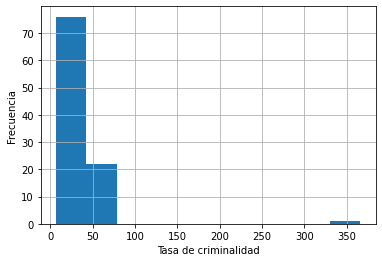

In [44]:
plt.hist(df['CrimeRate'])
plt.ylabel('Frecuencia')
plt.xlabel('Tasa de criminalidad')
plt.grid()
plt.show()

Consultando un poco sobre el índice de criminalidad, es un valor de entre 0 a 100. Observamos que existe un índice incorrecto de 366.1

Ahora, revisaremos cual es ese dato para retirarlo

In [45]:
df[df['CrimeRate'] > 100]

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
62,96200,9.62,366.1,0.0,4.8,"Phila,CC",Phila


In [46]:
df = df[df['CrimeRate'] <= 100]

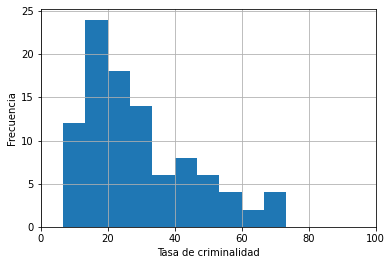

In [47]:
plt.hist(df['CrimeRate'])
plt.ylabel('Frecuencia')
plt.xlabel('Tasa de criminalidad')
plt.xlim(0, 100)
plt.grid()
plt.show()

In [54]:
df['CrimeRate'].describe()

count    98.000000
mean     29.173469
std      16.290061
min       6.600000
25%      17.400000
50%      24.100000
75%      39.125000
max      73.300000
Name: CrimeRate, dtype: float64

## Análisis Precios de las casas

In [50]:
df['HsPrc ($10,000)'].describe()

count    98.000000
mean     15.846454
std       8.686219
min       2.800000
25%       9.994000
50%      14.163700
75%      19.617250
max      47.511200
Name: HsPrc ($10,000), dtype: float64

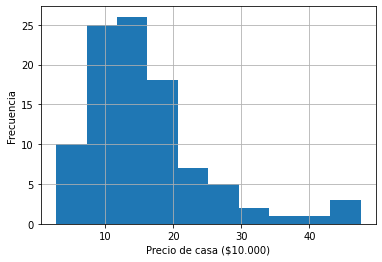

In [52]:
plt.hist(df['HsPrc ($10,000)'])
plt.ylabel('Frecuencia')
plt.xlabel('Precio de casa ($10.000)')
plt.grid()
plt.show()

- La mayor cantidad de casas vendidas tienen un precio cercano a $150 mil dólares.

- La casa más barata se vendió a $28 mil dólares

Obsevar la relación entre la tasa de criminalidad y el precio de la casa

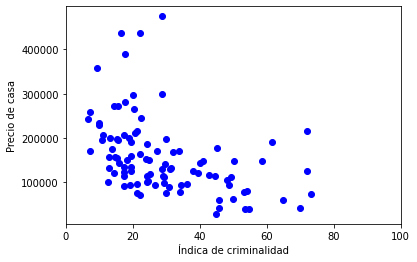

In [61]:
plt.plot(df['CrimeRate'], df['HousePrice'], 'bo')
plt.xlim(0, 100)
plt.xlabel('Índica de criminalidad')
plt.ylabel('Precio de casa')
plt.show()

Observamos una relación curva, lo siguiente será observar si hay una relación con el lugar.

## Análisis de condados

In [65]:
df['County'].unique()

array(['Montgome', 'Delaware', 'Bucks', 'Chester', 'Phila'], dtype=object)

In [76]:
df['HsPrc ($10,000)'].describe()

count    98.000000
mean     15.846454
std       8.686219
min       2.800000
25%       9.994000
50%      14.163700
75%      19.617250
max      47.511200
Name: HsPrc ($10,000), dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


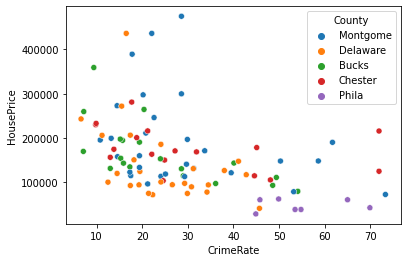

In [98]:
sns.scatterplot(df['CrimeRate'], df['HousePrice'], hue=df['County'])
plt.show()

- Podemos observar que el condado Phila tiene el indice de criminalidad más alto y por ende los precios en sus casas son más baratos
- Por otro lado, las casas del condado de Chester no pasan de los 30 mil dólares por más que algunas de sus casas tengan menor índice de criminalidad.
- Algo raro es que la mayoría de casas de Delaware tengan menor índice de criminalidad y a la vez tengan casas más baratas.